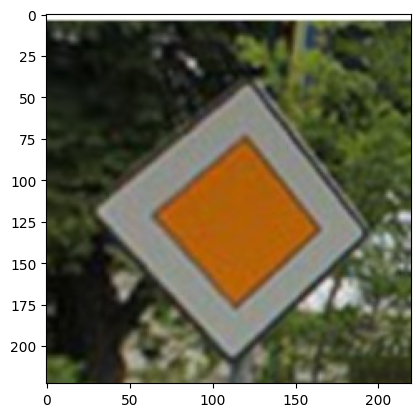

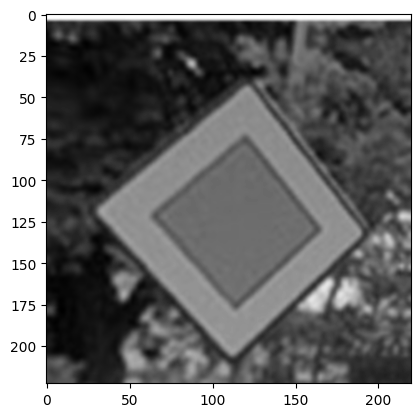

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('./znak.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(gray, cmap = 'gray', interpolation = 'bicubic')

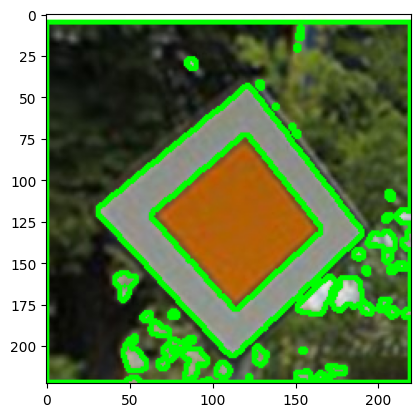

In [16]:
ret, binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.drawContours(image, contours, -1, (0,255,0), 2)
plt.imshow(img)
plt.show()

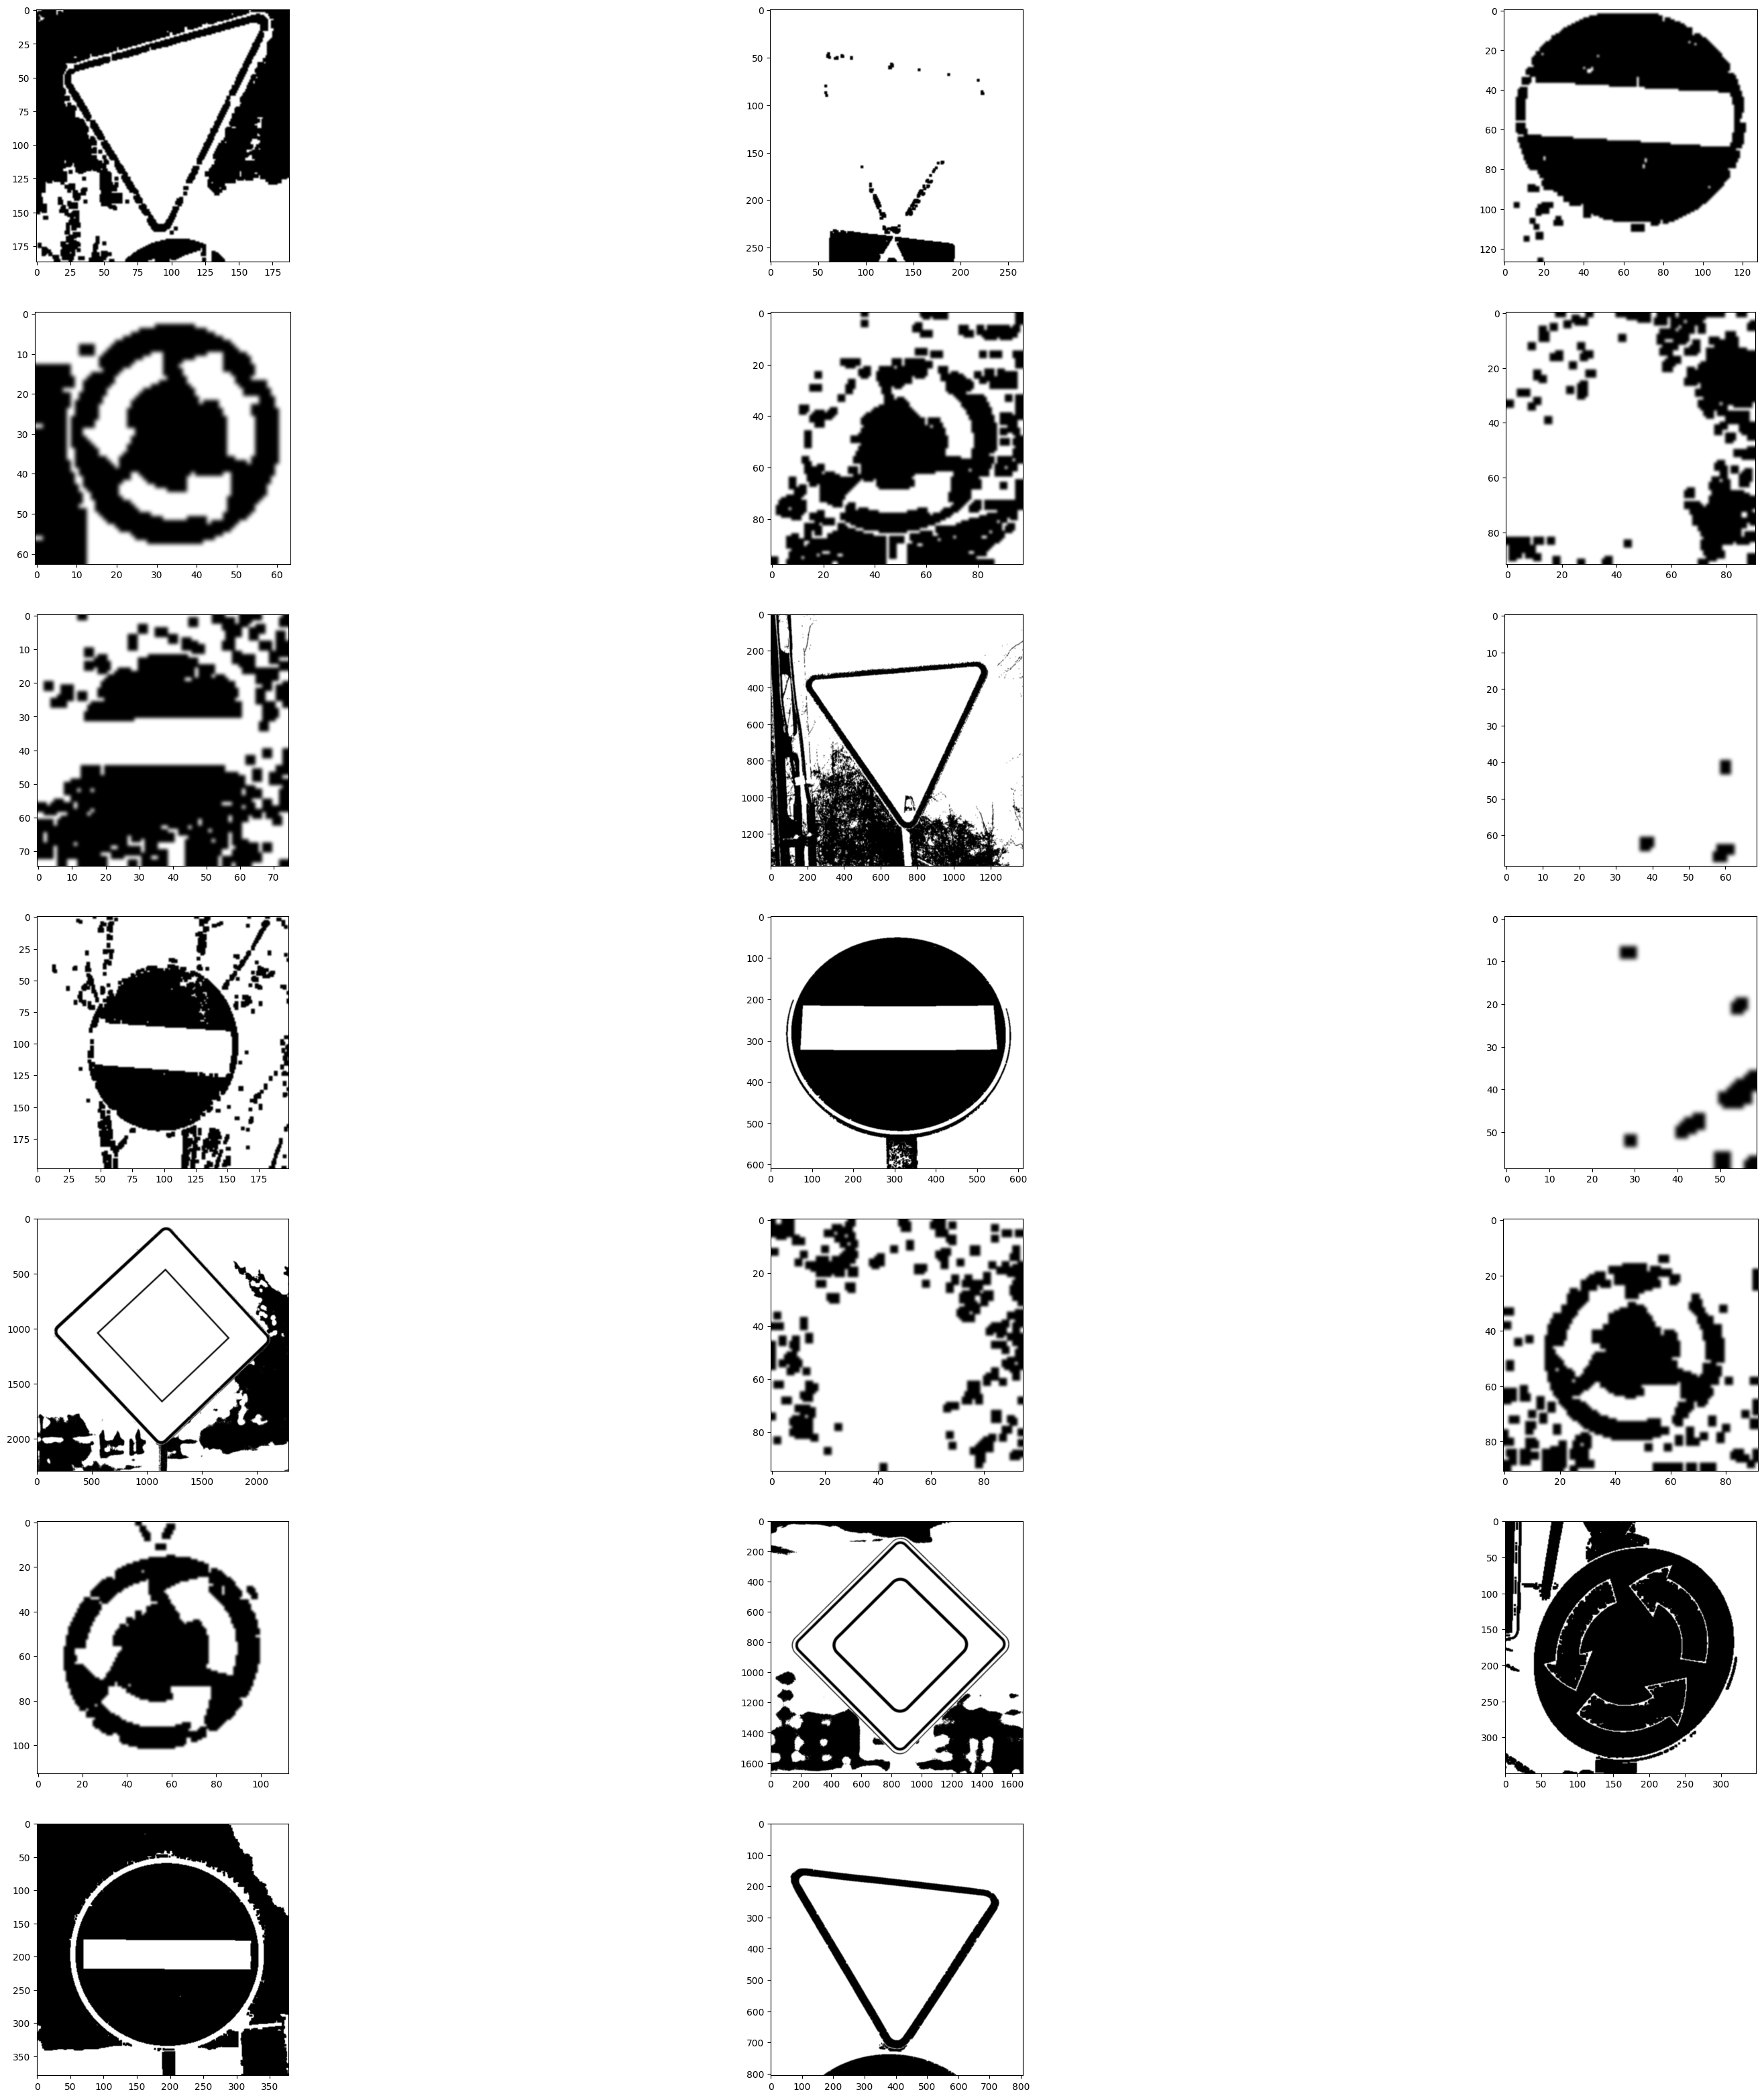

In [17]:
from PIL import Image
import glob

extensions = ("*.png","*.jpg","*.jpeg",)
glob_list = []
for extension in extensions:
    glob_list.extend(glob.glob("znaki/"+extension))
          
image_list = []
image_grey_list = []
image_contour_list = []
image_binary_list = []
image_hsv_list = []
col = 1

for filename in glob_list:
    
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    image_list.append(im)
    
    hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
    # mask = cv2.inRange(hsv, (100, 178, 0), (140, 255, 255))
    mask = cv2.inRange(hsv, (20, 178, 0), (60, 255, 255)) + cv2.inRange(hsv, (160, 178, 0), (179, 255, 255)) + cv2.inRange(hsv, (0, 178, 0), (20, 255, 255))
    imask = mask>0
    temp = np.zeros_like(im, np.uint8)
    temp[imask] = im[imask]
    image_hsv_list.append(temp)
    
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    # gray = cv2.GaussianBlur(gray, (3,3), 3)
    # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    kernel = np.array([[-0.5,-0.5,-0.5], [-0.5,5,-0.5], [-0.5,-0.5,-0.5]])
    gray = cv2.filter2D(gray, -1, kernel)
    image_grey_list.append(gray)
    
    # ret, binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
    # binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # border = 50
    # binary = cv2.copyMakeBorder(binary, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
    
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    
    image_binary_list.append(binary)
    
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    con = cv2.drawContours(im, contours, -1, (0,255,0), 2)
    image_contour_list.append(con)

def printSigns(image_list, is_grey):
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(40)
    
    col_number = 3
    row_number = 7
    num = 1
    
    for img in image_list:
        plt.subplot(row_number,col_number,num)
        if is_grey:
            plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
        else:
            plt.imshow(img)
        num += 1
        
# printSigns(image_hsv_list, False)
# printSigns(image_list, False)
printSigns(image_binary_list, True)
# printSigns(image_grey_list, True)
# printSigns(image_contour_list, False)

0.6756513226118666 166.81638418079095 169.63747645951037
(169.67565132261186, 116.81638418079095, 119.63747645951037) (10.675651322611866, 255, 255)
22.007344730111274 252.45821854912765 253.38842975206612
(12.007344730111274, 202.45821854912765, 203.38842975206612) (32.00734473011127, 255, 255)
24.849421275791734 234.71808999081728 234.15977961432506
(14.849421275791734, 184.71808999081728, 184.15977961432506) (34.849421275791734, 255, 255)
175.94351548784786 164.25741626794257 152.62392344497607
(165.94351548784786, 114.25741626794257, 102.62392344497607) (6.943515487847861, 255, 255)
107.17155030669363 174.24114832535886 162.19425837320574
(97.17155030669363, 124.24114832535886, 112.19425837320574) (117.17155030669363, 255, 255)
110.83366506208456 178.0097370983447 135.81499513145081
(100.83366506208456, 128.0097370983447, 85.81499513145081) (120.83366506208456, 255, 255)
16.64685694563286 200.961 164.526
(6.646856945632859, 150.961, 114.52600000000001) (26.64685694563286, 255, 255)

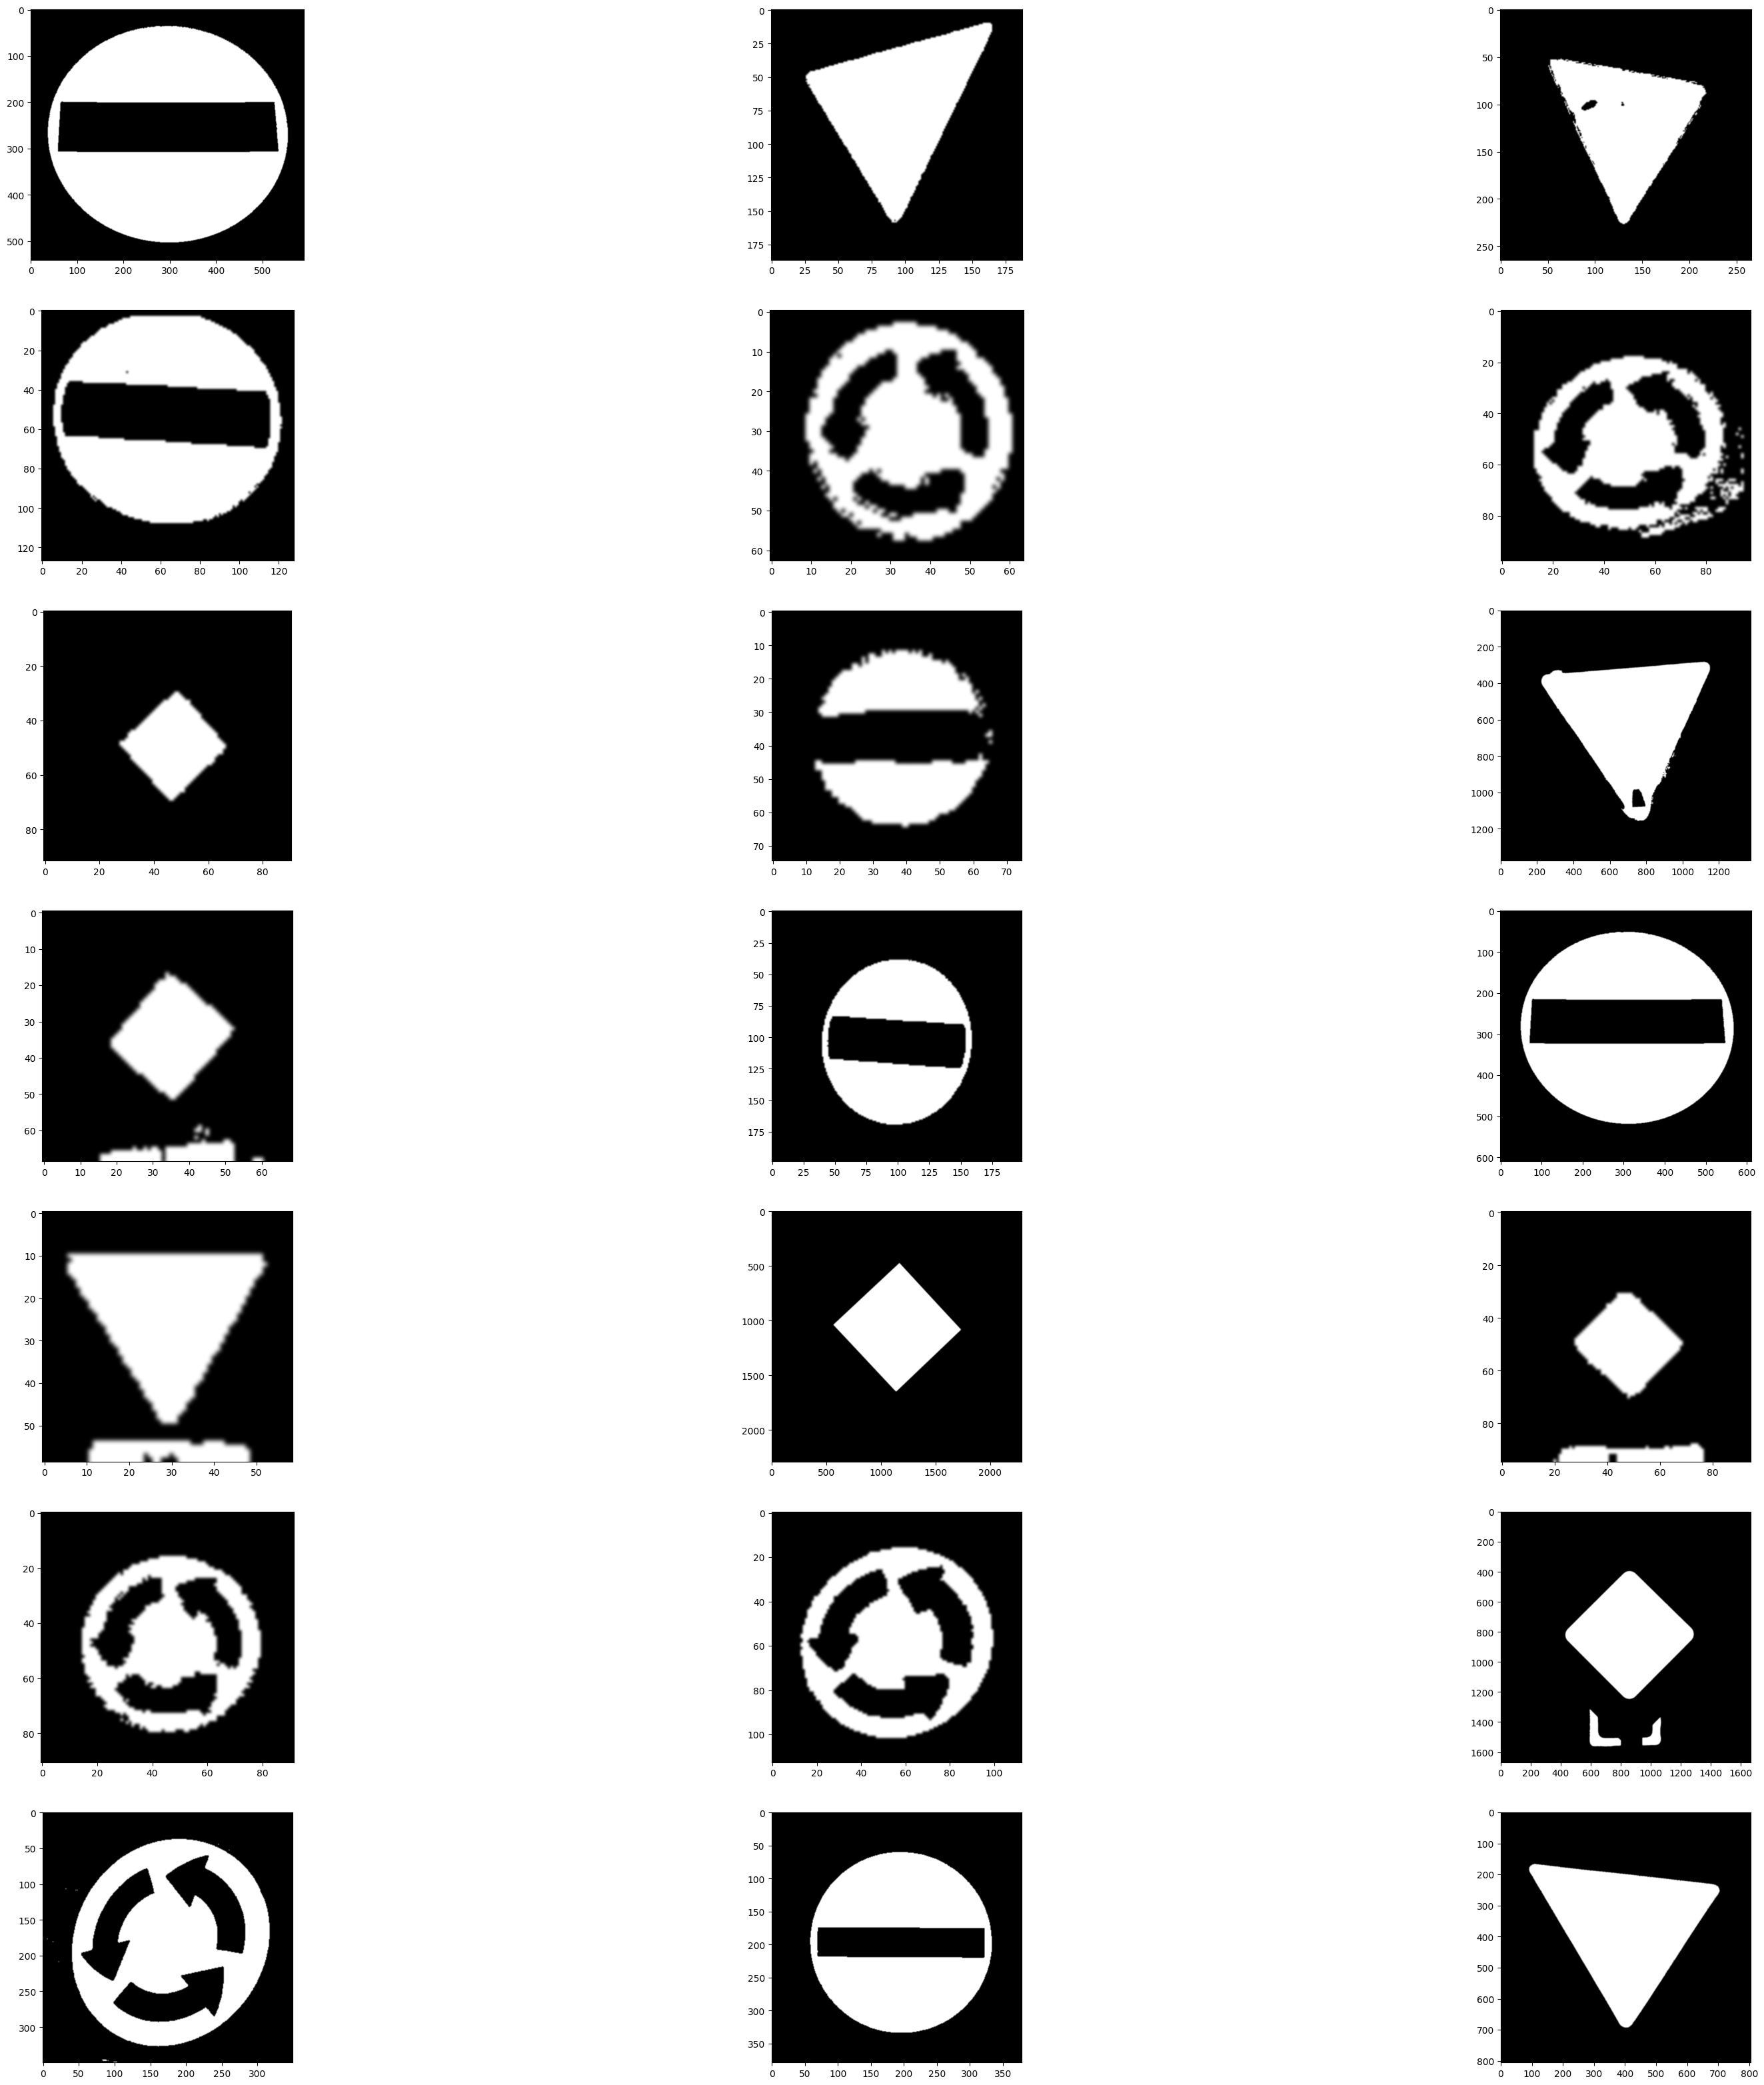

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import circmean

BLACK_THRESHOLD_VALUE = 76
WHITE_THRESHOLD_VALUE_MIN = 140
WHITE_THRESHOLD_SATURATION_MAX = 30

COLORFUL_PIXELS_REQUIRED = 1000

HUE_MARGIN = 10
SATURATION_MARGIN_MIN = 50
VALUE_MARGIN_MIN = 50


def readImageAsHSV(filename):
    BGR_image = cv2.imread(filename)
    HSV_image = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2HSV)
    return HSV_image
    # mask = cv2.inRange(hsv, (100, 178, 0), (140, 255, 255))
    mask = cv2.inRange(HSV_image, (20, 178, 0), (60, 255, 255)) + cv2.inRange(HSV_image, (160, 178, 0), (179, 255, 255)) + cv2.inRange(HSV_image, (0, 178, 0), (20, 255, 255))
    imask = mask>0
    temp = np.zeros_like(BGR_image, np.uint8)
    temp[imask] = BGR_image[imask]
    image_hsv_list.append(temp)
    
    gray = cv2.cvtColor(BGR_image, cv2.COLOR_RGB2GRAY)
    # gray = cv2.GaussianBlur(gray, (3,3), 3)
    # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    kernel = np.array([[-0.5,-0.5,-0.5], [-0.5,5,-0.5], [-0.5,-0.5,-0.5]])
    gray = cv2.filter2D(gray, -1, kernel)
    image_grey_list.append(gray)
    
    # ret, binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
    # binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # border = 50
    # binary = cv2.copyMakeBorder(binary, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
    
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    
    image_binary_list.append(binary)
    
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    con = cv2.drawContours(BGR_image, contours, -1, (0,255,0), 2)
    image_contour_list.append(con)
    
def getParametersFromImage(HSV_image):
    image_size = np.shape(HSV_image)[0]
    FILL_RATIO = 0.5
    return image_size, FILL_RATIO
    

def findMainColor(HSV_image):
    image_size, fill_ratio = getParametersFromImage(HSV_image)
    middle_px = image_size // 2
    counter = 0
    distance = 0
    hsv_list = []
    while(counter < COLORFUL_PIXELS_REQUIRED):
        for i in range(middle_px - distance, middle_px + distance + 1):
            for j in range(middle_px - distance, middle_px + distance + 1):
                if isEdge(i, j, middle_px, distance) and isColorful(HSV_image[i][j]): 
                    counter += 1
                    hsv_list.append(HSV_image[i][j])
        distance += 1
    hue_list = []
    saturation_sum = 0
    value_sum = 0
    for hsv in hsv_list:
        hue_list.append(hsv[0])
        saturation_sum += hsv[1]
        value_sum += hsv[2]
    hue_mean = circmean(hue_list, high=180)
    saturation_mean = saturation_sum / len(hsv_list)
    value_mean = value_sum / len(hsv_list)
    print (hue_mean, saturation_mean, value_mean)
    return hue_mean, saturation_mean, value_mean 
    
def isEdge(x, y, middle, distance):
    return x == middle - distance or y == middle - distance or x == middle + distance or y == middle + distance
def isColorful(HSV_value):
    return not isBlack(HSV_value) and not isWhite(HSV_value)
def isBlack(HSV_value):
    return HSV_value[2] < BLACK_THRESHOLD_VALUE
def isWhite(HSV_value):
    return HSV_value[2] > WHITE_THRESHOLD_VALUE_MIN and HSV_value[1] < WHITE_THRESHOLD_SATURATION_MAX
    
def makeMask(HSV_image, HSV_mean):
    
    lower_hue = HSV_mean[0] - HUE_MARGIN
    if lower_hue < 0:
        lower_hue += 179
    if lower_hue > 179:
        lower_hue -= 179
    
    upper_hue = HSV_mean[0] + HUE_MARGIN
    if upper_hue < 0:
        upper_hue += 179
    if upper_hue > 179:
        upper_hue -= 179
    
    lowerBound = (lower_hue, HSV_mean[1] - SATURATION_MARGIN_MIN, HSV_mean[2] - VALUE_MARGIN_MIN)
    upperBound = (upper_hue, 255, 255)
    
    print(lowerBound, upperBound)
    
    if lowerBound[0] > upperBound[0]:
        mask1 = cv2.inRange(HSV_image, lowerb=(0, lowerBound[1], lowerBound[2]), upperb = upperBound) 
        mask2 = cv2.inRange(HSV_image, lowerb=lowerBound, upperb = (179, upperBound[1], upperBound[2]))
        mask = mask1 | mask2
    else:
        mask = cv2.inRange(HSV_image, lowerb = lowerBound, upperb = upperBound)
    return mask
    # plt.imshow(mask, cmap = 'gray')
    # imask = mask > 0
    # temp = np.zeros_like(BGR_image, np.uint8)
    # temp[imask] = BGR_image[imask]
    # image_hsv_list.append(temp)
    
    # gray = cv2.cvtColor(BGR_image, cv2.COLOR_RGB2GRAY)
    # # gray = cv2.GaussianBlur(gray, (3,3), 3)
    # # kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    # kernel = np.array([[-0.5,-0.5,-0.5], [-0.5,5,-0.5], [-0.5,-0.5,-0.5]])
    # gray = cv2.filter2D(gray, -1, kernel)
    # image_grey_list.append(gray)
    
    # # ret, binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
    # # binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    # ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # # border = 50
    # # binary = cv2.copyMakeBorder(binary, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
    
    # kernel = np.ones((3, 3), np.uint8)
    # binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    
    # image_binary_list.append(binary)
    
    # contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # con = cv2.drawContours(BGR_image, contours, -1, (0,255,0), 2)
    # image_contour_list.append(con)
    
    
# def saveMask():

def showAllMasks():
    extensions = ("*.png","*.jpg","*.jpeg",)
    glob_list = []
    for extension in extensions:
        glob_list.extend(glob.glob("znaki/"+extension))
        
    mask_list = []
        
    for filename in glob_list:
        
        hue_mean, saturation_mean, value_mean = findMainColor(readImageAsHSV(filename))
        HSV_mean = (hue_mean, saturation_mean, value_mean)
        mask = makeMask(readImageAsHSV(filename), HSV_mean)
        mask_list.append(mask)
        
    printSigns(mask_list, True)
    
def showSingleMask(filename):
    hue_mean, saturation_mean, value_mean = findMainColor(readImageAsHSV(filename))
    HSV_mean = (hue_mean, saturation_mean, value_mean)
    mask = makeMask(readImageAsHSV(filename), HSV_mean)
    plt.imshow(mask, cmap='gray')
    
# showSingleMask("znaki/B-2_1-lepszy.jpg")
showAllMasks()
